In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
qcdm2.struct_cleanup()
qcdm2.empty()
QCDM.struct_cleanup()
QCDM.empty()

NameError: name 'qcdm2' is not defined

In [3]:
params={'T_cmb':2.7255, 'H0':75,
        'Omega_b':0.053,'Omega_cdm':0.296, 'Omega_k':0.0, 'Omega_Lambda':0.0, 'Omega_fld':0.0,
       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,33.9627,1.0,17.3,10**11' , 
        'scf_tuning_index':4, 'a_ini_over_a_today_default' : 10**-30,'output':'lCl, tCl','lensing':'yes'}
#params={'Omega_Lambda':0.0, 'Omega_fld':0.0,
#       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,34.8,2.95,0' , 'scf_tuning_index':2}
params2={'T_cmb':2.7255, 'H0':75,
        'Omega_b':0.053,'Omega_cdm':0.296, 'Omega_k':0.0, 'Omega_Lambda':0.0, 'Omega_fld':0.0,
       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,33.9627,1.0,17.3,10**11' , 
        'scf_tuning_index':4, 'a_ini_over_a_today_default' : 10**-17,'output':'lCl, tCl','lensing':'yes'}



#params2 = {'H0':75, 'T_cmb':2.7255,
#        'Omega_b':0.05,'Omega_cdm':0.25, 'Omega_k':0.0, 'Omega_Lambda':0.0, 'Omega_fld':0.0,
#       'Omega_scf': -1, 'attractor_ic_scf':'no', 'scf_parameters':'8,2,0.01,34.8,100,10' , 'scf_tuning_index':0.0,
#       'output':'lCl, tCl','lensing':'yes}



In [4]:
QCDM = Class()
QCDM.set(params)
QCDM.compute()
qcdm2 = Class()
qcdm2.set(params2)
qcdm2.compute()


In [16]:

lensed_cl = QCDM.lensed_cl(10**3)
bgQCDM = QCDM.get_background()
lensed_cl2 = qcdm2.lensed_cl(10**3)
bgqcdm2 = qcdm2.get_background()
print(bgQCDM.viewkeys())
print(lensed_cl.viewkeys())

zlist = bgQCDM['z']
alist = 1/(zlist + 1)
zlist2 = bgqcdm2['z']
alist2 = 1/(zlist2 + 1)

dict_keys([u'(.)rho_crit', u'V_scf', u'(.)p_scf', u'(.)p_tot_prime', u'(.)rho_cdm', u'phi_scf', u'(.)rho_ur', u'(.)rho_tot', u'(.)p_prime_scf', u'ang.diam.dist.', u'proper time [Gyr]', u"V'_scf", u'H [1/Mpc]', u'conf. time [Mpc]', u'(.)p_tot', u'lum. dist.', u"V''_scf", u'gr.fac. f', u'(.)rho_scf', u'comov. dist.', u'comov.snd.hrz.', u'(.)rho_b', u'(.)rho_g', u'gr.fac. D', u"phi'_scf", u'z'])
dict_keys([u'tt', u'ell', u'pp', u'tp'])


Text(0,0.5,'$\\phi$')

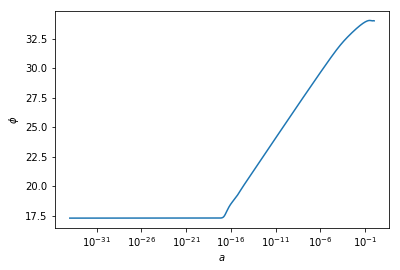

In [7]:
plt.semilogx(alist, bgQCDM["phi_scf"])
plt.xlabel(r"$a$")
plt.ylabel(r"$\phi$")

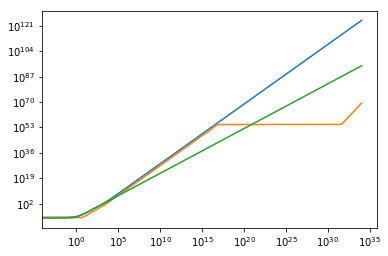

In [8]:
plt.loglog(bgQCDM['z'], bgQCDM['(.)rho_crit'],bgQCDM['z'],bgQCDM['(.)rho_scf'],bgQCDM['z'],bgQCDM['(.)rho_cdm'])

Text(0,0.5,'$\\rho_n$')

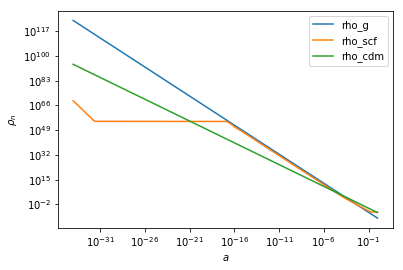

In [9]:
plt.loglog(alist, bgQCDM['(.)rho_g'], alist,bgQCDM['(.)rho_scf'],alist,bgQCDM['(.)rho_cdm'])
plt.legend(['rho_g', 'rho_scf', 'rho_cdm'])
plt.xlabel(r"$a$")
plt.ylabel(r"$\rho_n$")

0.0010872418139442732


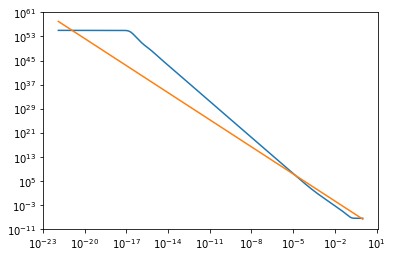

In [10]:
rng = 4000
plt.loglog(alist[rng:],bgQCDM['(.)rho_scf'][rng:],alist[rng:],( bgQCDM['(.)rho_cdm'][rng:] +bgQCDM['(.)rho_b'][rng:] ))

print(bgQCDM['(.)rho_scf'][4000]/(bgQCDM['(.)rho_cdm'][4000] + bgQCDM['(.)rho_b'][4000] ))

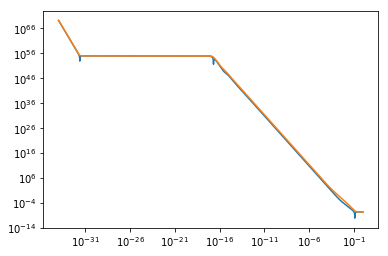

In [11]:
plt.loglog(alist, np.abs(bgQCDM['(.)p_scf']), alist, bgQCDM['(.)rho_scf'])

In [12]:
val = 600
print(alist[val],bgQCDM['V_scf'][val],bgQCDM['phi_scf'][val],bgQCDM["phi'_scf"][val])

(6.571769646802019e-33, 3.155784259475351e+55, 17.3, 0.002315449618340519)


In [13]:
print(alist[3300],bgQCDM['(.)rho_scf'][3300])
print(alist[3300],bgQCDM['(.)p_scf'][3300])

(9.93694364750895e-25, 1.0519280864917837e+55)
(9.93694364750895e-25, -1.0519280864917837e+55)


Text(0,0.5,'$w_\\phi$')

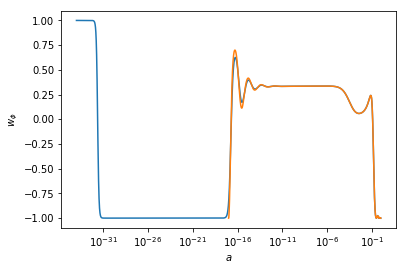

In [17]:
plt.semilogx(alist, (bgQCDM['(.)p_scf']/bgQCDM['(.)rho_scf']),alist2, (bgqcdm2['(.)p_scf']/bgqcdm2['(.)rho_scf'])   )
plt.xlabel(r"$a$")
plt.ylabel(r"$w_\phi$")

17.3
3.155784259475351e+55
1.6666666666666772e+69
15.220475278320116


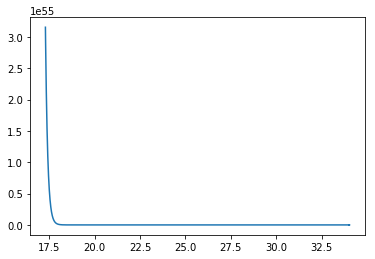

In [107]:
plt.plot(bgQCDM['phi_scf'],bgQCDM['V_scf'])
print(bgQCDM['phi_scf'][4619])
print(bgQCDM['V_scf'][0])
print(bgQCDM['(.)rho_scf'][0])
print(bgQCDM["phi'_scf"][4600])

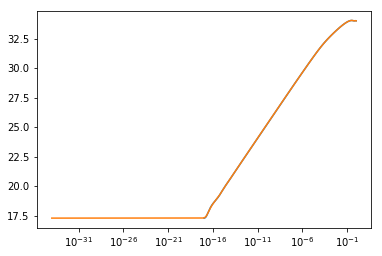

In [131]:
plt.semilogx(alist2, bgqcdm2['phi_scf'],alist, bgQCDM['phi_scf'])

In [15]:
plt.semilogx(alist2, bgqcdm2['(.)p_scf']/bgqcdm2['(.)rho_scf'])
plt.semilogx(alist, bgQCDM['(.)p_scf']/bgQCDM['(.)rho_scf'])



NameError: name 'alist2' is not defined

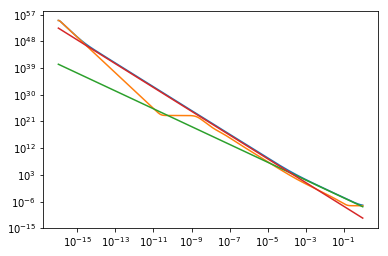

In [111]:
plt.loglog(alist2, bgqcdm2['(.)rho_crit'], alist2,bgqcdm2['(.)rho_scf'],alist2,bgqcdm2['(.)rho_cdm'], alist2,bgqcdm2['(.)rho_g'])

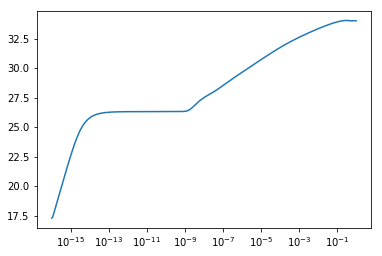

In [112]:
plt.semilogx(alist2, bgqcdm2["phi_scf"])

In [113]:
bgqcdm2["(.)p_prime_scf"][4619]

-2.0400388577225512e-07

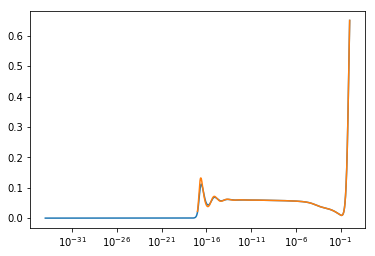

In [163]:
plt.semilogx(alist, bgQCDM['(.)rho_scf']/bgQCDM['(.)rho_crit']
            )
plt.semilogx(alist2, bgqcdm2['(.)rho_scf']/bgqcdm2['(.)rho_crit']
            )

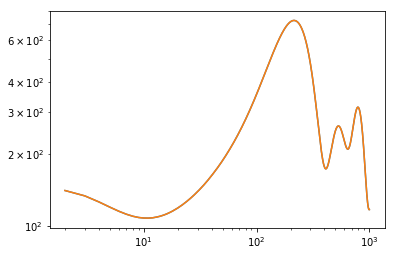

In [164]:
l = np.array(range(2,10**3 + 1))
factor = l*(l+1)/(2*np.pi)
plt.loglog(l,factor*10**(12)*lensed_cl['tt'][2:],l,factor*10**(12)*lensed_cl2['tt'][2:])